# Agenda

Nesta aula iremos aprofundar os conhecimentos na linguagem SQL, trazendo os conceitos de JOINS e seus tipos, SUBQUERIES e suas formas de utilização.

**Setup**

In [ ]:
import pandas as pd
import sqlite3

In [ ]:
con = sqlite3.connect('database.db')

**Tópicos**:
 - Comandos DQL (Parte II):
    - JOINS:
        - SELF JOIN
        - LEFT JOIN
        - RIGHT JOIN
        - INNER JOIN
        - FULL OUTER JOIN, UNION, UNION ALL
        - CROSS JOIN
    - SUBQUERIES:
        - SELECT
        - FROM 
        - WHERE
    - WINDOW FUNCTIONS:
        - LAG & LEAD
 - BÔNUS
 - Exercícios


![database example](http://www.mysqltutorial.org/wp-content/uploads/2009/12/MySQL-Sample-Database-Schema.png)


# JOINS

JOINS são maneiras de combinar informações de duas ou mais tabelas em uma única. A forma de combinação é definida por meio do tipo de JOIN escolhido. Além disso, é possível combinar uma tabela com ela mesma, ou seja, não precisamos necessariamente de mais de uma tabela para realizar um JOIN. No caso de haver mais de 2 tabelas definimos JOINS múltiplos no ```FROM```.

## SELF JOIN

Como falado anteriormente, uma tabela pode ser combinada consigo mesma baseando-se em uma condição específica nas linhas. Nesse caso, devemos utilizar apelidos para as tabelas do JOIN, de maneira que não haja um comando dúbio para o banco de dados e ele saiba exatamente a qual tabela o usuário se refere.

No nosso banco de dados, temos informações de funcionários (tabela employees), vamos dar uma olhada.

In [ ]:
query='''
SELECT *
FROM employees
'''
pd.read_sql(query,con)

,employeeNumber,lastName,firstName,extension,email,officeCode,reportsTo,jobTitle
0,1002,Murphy,Diane,x5800,dmurphy@classicmodelcars.com,1,NaN,President
1,1056,Patterson,Mary,x4611,mpatterso@classicmodelcars.com,1,1002.0,VP Sales
2,1076,Firrelli,Jeff,x9273,jfirrelli@classicmodelcars.com,1,1002.0,VP Marketing
3,1088,Patterson,William,x4871,wpatterson@classicmodelcars.com,6,1056.0,Sales Manager (APAC)
4,1102,Bondur,Gerard,x5408,gbondur@classicmodelcars.com,4,1056.0,Sale Manager (EMEA)
5,1143,Bow,Anthony,x5428,abow@classicmodelcars.com,1,1056.0,Sales Manager (NA)
6,1165,Jennings,Leslie,x3291,ljennings@classicmodelcars.com,1,1143.0,Sales Rep
7,1166,Thompson,Leslie,x4065,lthompson@classicmodelcars.com,1,1143.0,Sales Rep
8,1188,Firrelli,Julie,x2173,jfirrelli@classicmodelcars.com,2,1143.0,Sales Rep
9,1216,Patterson,Steve,x4334,spatterson@classicmodelcars.com,2,1143.0,Sales Rep


Perceba que existe a coluna ```reportsTo``` que indica o ```employeeNumber``` do seu chefe (pessoa para quem o funcionário responde na empresa) 

E se quiséssemos trazer o nome do chefe de cada funcionário, caso ele tenha um? 
Podemos fazer um ```SELF JOIN```

```sql
SELECT tabela1.*,
       tabela2.coluna1
       tabela2.coluna2
FROM 
    tabela AS tabela1
JOIN
    tabela AS tabela2
    ON tabela1.coluna = tabela2.coluna
```

Vamos trazer o nome do empregado, seu identificador, sua atribuição, o primeiro nome do seu chefe e o identificador do chefe.

In [ ]:
query2 = """
            SELECT tb1.employeeNumber  AS ID_EMPREGADO,
                    tb1.firstName as NOME_EMPREGADO,
                    tb1.jobTitle as CARGO_EMPREGADO,
                    tb2.firstName as NOME_CHEFE,
                    tb2.employeeNumber  AS ID_CHEFE
            FROM
                employees as tb1
            JOIN
                employees as tb2
                ON tb1.reportsTo = tb2.employeeNumber
        """
df_chefe = pd.read_sql(query2, con)
df_chefe

,ID_EMPREGADO,NOME_EMPREGADO,CARGO_EMPREGADO,NOME_CHEFE,ID_CHEFE
0,1056,Mary,VP Sales,Diane,1002
1,1076,Jeff,VP Marketing,Diane,1002
2,1088,William,Sales Manager (APAC),Mary,1056
3,1102,Gerard,Sale Manager (EMEA),Mary,1056
4,1143,Anthony,Sales Manager (NA),Mary,1056
5,1165,Leslie,Sales Rep,Anthony,1143
6,1166,Leslie,Sales Rep,Anthony,1143
7,1188,Julie,Sales Rep,Anthony,1143
8,1216,Steve,Sales Rep,Anthony,1143
9,1286,Foon Yue,Sales Rep,Anthony,1143


## LEFT JOIN

Se quisermos trazer os clientes (customers) e as compras que fizeram, como podemos fazer? Reflita: a tabela de orders (pedidos) pode conter mais de um mesmo cliente (um cliente pode ter vários pedidos) OK. Mas nem todo cliente registrado no sistema precisa necessariamente ter feito uma compra. Se quisermos trazer todos os dados de clientes e suas compras, mesmo aqueles clientes que nunca fizeram compras, podemos utilizar um ```LEFT JOIN```

```sql
SELECT tb1.coluna1,
       tb1.colunas2,
       tb2.coluna1,
       tb2.coluna2,
FROM 
    table1 AS tb1
LEFT JOIN
    table2 AST tb2
    ON tb1.coluna1 = tb2.coluna2
```

Vamo trazer os dados dos clientes, suas compras e para aqueles clientes que ainda não fizeram nenhuma compra, vamos trazer apenas os seus dados. Em suma, se tivermos duas tabelas A e B. A ```LEFT JOIN``` B traz todas as linhas de A e traz todas as linhas de B para as quais há correspondência da coluna especificada em A.

In [ ]:
query = '''
            SELECT tb_customers.*,
                    tb_orders.*
            FROM customers as tb_customers
            LEFT JOIN
                orders as tb_orders
                ON tb_customers.customerNumber = tb_orders.customerNumber
            WHERE tb_orders.customerNumber is NULL


'''

pd.read_sql(query,con)

,customerNumber,customerName,contactLastName,contactFirstName,phone,addressLine1,addressLine2,city,state,postalCode,country,salesRepEmployeeNumber,creditLimit,orderNumber,orderDate,requiredDate,shippedDate,status,comments,customerNumber
0,125,Havel & Zbyszek Co,Piestrzeniewicz,Zbyszek,(26) 642-7555,ul. Filtrowa 68,None,Warszawa,None,01-012,Poland,NaN,0,None,None,None,None,None,None,None
1,168,American Souvenirs Inc,Franco,Keith,2035557845,149 Spinnaker Dr.,Suite 101,New Haven,CT,97823,USA,1286.0,0,None,None,None,None,None,None,None
2,169,Porto Imports Co.,de Castro,Isabel,(1) 356-5555,Estrada da saúde n. 58,None,Lisboa,None,1756,Portugal,NaN,0,None,None,None,None,None,None,None
3,206,"Asian Shopping Network, Co",Walker,Brydey,+612 9411 1555,Suntec Tower Three,8 Temasek,Singapore,None,038988,Singapore,NaN,0,None,None,None,None,None,None,None
4,223,Natürlich Autos,Kloss,Horst,0372-555188,Taucherstraße 10,None,Cunewalde,None,01307,Germany,NaN,0,None,None,None,None,None,None,None
5,237,ANG Resellers,Camino,Alejandra,(91) 745 6555,"Gran Vía, 1",None,Madrid,None,28001,Spain,NaN,0,None,None,None,None,None,None,None
6,247,Messner Shopping Network,Messner,Renate,069-0555984,Magazinweg 7,None,Frankfurt,None,60528,Germany,NaN,0,None,None,None,None,None,None,None
7,273,"Franken Gifts, Co",Franken,Peter,089-0877555,Berliner Platz 43,None,München,None,80805,Germany,NaN,0,None,None,None,None,None,None,None
8,293,BG&E Collectables,Harrison,Ed,+41 26 425 50 01,Rte des Arsenaux 41,None,Fribourg,None,1700,Switzerland,NaN,0,None,None,None,None,None,None,None
9,303,Schuyler Imports,Schuyler,Bradley,+31 20 491 9555,Kingsfordweg 151,None,Amsterdam,None,1043 GR,Netherlands,NaN,0,None,None,None,None,None,None,None


## RIGHT JOIN

O ```RIGHT JOIN``` é similar ao ```LEFT JOIN```, inclusive é possível fazer um ```RIGHT JOIN```utilizando um ```LEFT JOIN``` apenas invertendo a ordem das tabelas. No nosso caso, isso equivaleria a trazer todas as orders, mesmo aquelas que não tem um customerNumber associado.

```sql
SELECT tb1.coluna1,
       tb1.colunas2,
       tb2.coluna1,
       tb2.coluna2,
FROM 
    table1 AS tb1
RIGHT JOIN
    table2 AST tb2
    ON tb1.coluna1 = tb2.coluna2
```

In [ ]:
query4 = """
            SELECT tb_customers.*,
                    tb_orders.*
            FROM
                orders as tb_orders
            LEFT JOIN
                customers as tb_customers
                ON tb_customers.customerNumber = tb_orders.customerNumber
        """
pd.read_sql(query4, con)

,customerNumber,customerName,contactLastName,contactFirstName,phone,addressLine1,addressLine2,city,state,postalCode,country,salesRepEmployeeNumber,creditLimit,orderNumber,orderDate,requiredDate,shippedDate,status,comments,customerNumber
0,363,Online Diecast Creations Co.,Young,Dorothy,6035558647,2304 Long Airport Avenue,None,Nashua,NH,62005,USA,1216,114200,10100,2003-01-06,2003-01-13,2003-01-10,Shipped,None,363
1,128,"Blauer See Auto, Co.",Keitel,Roland,+49 69 66 90 2555,Lyonerstr. 34,None,Frankfurt,None,60528,Germany,1504,59700,10101,2003-01-09,2003-01-18,2003-01-11,Shipped,Check on availability.,128
2,181,Vitachrome Inc.,Frick,Michael,2125551500,2678 Kingston Rd.,Suite 101,NYC,NY,10022,USA,1286,76400,10102,2003-01-10,2003-01-18,2003-01-14,Shipped,None,181
3,121,Baane Mini Imports,Bergulfsen,Jonas,07-98 9555,Erling Skakkes gate 78,None,Stavern,None,4110,Norway,1504,81700,10103,2003-01-29,2003-02-07,2003-02-02,Shipped,None,121
4,141,Euro+ Shopping Channel,Freyre,Diego,(91) 555 94 44,"C/ Moralzarzal, 86",None,Madrid,None,28034,Spain,1370,227600,10104,2003-01-31,2003-02-09,2003-02-01,Shipped,None,141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,124,Mini Gifts Distributors Ltd.,Nelson,Susan,4155551450,5677 Strong St.,None,San Rafael,CA,97562,USA,1165,210500,10421,2005-05-29,2005-06-06,None,In Process,Custom shipping instructions were sent to ware...,124
322,157,Diecast Classics Inc.,Leong,Kelvin,2155551555,7586 Pompton St.,None,Allentown,PA,70267,USA,1216,100600,10422,2005-05-30,2005-06-11,None,In Process,None,157
323,314,Petit Auto,Dewey,Catherine,(02) 5554 67,Rue Joseph-Bens 532,None,Bruxelles,None,B-1180,Belgium,1401,79900,10423,2005-05-30,2005-06-05,None,In Process,None,314
324,141,Euro+ Shopping Channel,Freyre,Diego,(91) 555 94 44,"C/ Moralzarzal, 86",None,Madrid,None,28034,Spain,1370,227600,10424,2005-05-31,2005-06-08,None,In Process,None,141


O ```RIGHT JOIN``` não existe no ```SQLite```. Ele é implementado utilizando o ```LEFT JOIN```. Em alguns SGBDS ele existe.

## INNER JOIN

Outro caso de JOIN é o ```INNER JOIN```. Nesse caso a query retorna apenas os registros em que há correspondência exata entre as colunas das tabelas. Trazendo pro nosso contexto, os clientes que ainda não realizaram alguma pedido não serão retornados.

```sql
SELECT tb1.coluna1,
       tb1.colunas2,
       tb2.coluna1,
       tb2.coluna2,
FROM 
    table1 AS tb1
INNER JOIN
    table2 AST tb2
    ON tb1.coluna1 = tb2.coluna2
```

In [ ]:
query = '''
SELECT 
  tb_customers.*,
  tb_orders.*

FROM customers as tb_customers
INNER JOIN
  orders as tb_orders
  ON tb_customers.customerNumber = tb_orders.customerNumber

'''
pd.read_sql(query,con)

,customerNumber,customerName,contactLastName,contactFirstName,phone,addressLine1,addressLine2,city,state,postalCode,country,salesRepEmployeeNumber,creditLimit,orderNumber,orderDate,requiredDate,shippedDate,status,comments,customerNumber
0,363,Online Diecast Creations Co.,Young,Dorothy,6035558647,2304 Long Airport Avenue,None,Nashua,NH,62005,USA,1216,114200,10100,2003-01-06,2003-01-13,2003-01-10,Shipped,None,363
1,128,"Blauer See Auto, Co.",Keitel,Roland,+49 69 66 90 2555,Lyonerstr. 34,None,Frankfurt,None,60528,Germany,1504,59700,10101,2003-01-09,2003-01-18,2003-01-11,Shipped,Check on availability.,128
2,181,Vitachrome Inc.,Frick,Michael,2125551500,2678 Kingston Rd.,Suite 101,NYC,NY,10022,USA,1286,76400,10102,2003-01-10,2003-01-18,2003-01-14,Shipped,None,181
3,121,Baane Mini Imports,Bergulfsen,Jonas,07-98 9555,Erling Skakkes gate 78,None,Stavern,None,4110,Norway,1504,81700,10103,2003-01-29,2003-02-07,2003-02-02,Shipped,None,121
4,141,Euro+ Shopping Channel,Freyre,Diego,(91) 555 94 44,"C/ Moralzarzal, 86",None,Madrid,None,28034,Spain,1370,227600,10104,2003-01-31,2003-02-09,2003-02-01,Shipped,None,141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,124,Mini Gifts Distributors Ltd.,Nelson,Susan,4155551450,5677 Strong St.,None,San Rafael,CA,97562,USA,1165,210500,10421,2005-05-29,2005-06-06,None,In Process,Custom shipping instructions were sent to ware...,124
322,157,Diecast Classics Inc.,Leong,Kelvin,2155551555,7586 Pompton St.,None,Allentown,PA,70267,USA,1216,100600,10422,2005-05-30,2005-06-11,None,In Process,None,157
323,314,Petit Auto,Dewey,Catherine,(02) 5554 67,Rue Joseph-Bens 532,None,Bruxelles,None,B-1180,Belgium,1401,79900,10423,2005-05-30,2005-06-05,None,In Process,None,314
324,141,Euro+ Shopping Channel,Freyre,Diego,(91) 555 94 44,"C/ Moralzarzal, 86",None,Madrid,None,28034,Spain,1370,227600,10424,2005-05-31,2005-06-08,None,In Process,None,141


## FULL OUTER JOIN, UNION, UNION ALL

O ```FULL OUTER JOIN``` é a combinação de um ```LEFT JOIN``` com um ```RIGHT JOIN```. Como no SQLite não existe ```RIGHT JOIN```, precisamos utilizar dois ```LEFT JOIN```e um ```UNION```.

Mas o que é o ```UNION```?

<img src='https://www.softwaretestingclass.com/wp-content/uploads/2013/06/sql-union-all-query.png'>

O ```UNION``` funciona como um ```append``` do Pandas e não duplica linhas, caso exista duplicação. O ```UNION ALL``` mantém as linhas duplicadas, caso existam. É importante destacar que tem que haver match dos tipos das colunas.

```sql
SELECT * 
FROM table1

UNION ALL

SELECT *
FROM table2

```

Vamos construir nosso ```FULL OUTER JOIN```

In [ ]:
query = '''
            SELECT tb_customers.customerNumber as customerNumber_c,
                    tb_customers.customerName as customerName_c,
                    tb_orders.customerNumber as customerNumber_o,
                    tb_orders.orderNumber as orderNumber_o
            FROM customers as tb_customers
            LEFT JOIN
                orders as tb_orders
                ON tb_customers.customerNumber = tb_orders.customerNumber

            UNION ALL

            SELECT tb_customers.customerNumber as customerNumber_c,
                    tb_customers.customerName as customerName_c,
                    tb_orders.customerNumber as customerNumber_o,
                    tb_orders.orderNumber as orderNumber_o
            FROM orders as tb_orders
            LEFT JOIN
                customers as tb_customers
                ON tb_customers.customerNumber = tb_orders.customerNumber

'''
pd.read_sql(query,con)

,customerNumber_c,customerName_c,customerNumber_o,orderNumber_o
0,103,Atelier graphique,103.0,10123.0
1,103,Atelier graphique,103.0,10298.0
2,103,Atelier graphique,103.0,10345.0
3,112,Signal Gift Stores,112.0,10124.0
4,112,Signal Gift Stores,112.0,10278.0
...,...,...,...,...
671,124,Mini Gifts Distributors Ltd.,124.0,10421.0
672,157,Diecast Classics Inc.,157.0,10422.0
673,314,Petit Auto,314.0,10423.0
674,141,Euro+ Shopping Channel,141.0,10424.0


Verifique que o total de linhas do ```FULL JOIN``` deveria ser a soma das linhas do ```LEFT JOIN``` + linhas do ```RIGHT JOIN```

## CROSS JOIN

O ```CROSS JOIN```realiza todos os cruzamentos possíveis entre as linhas das tabelas especificadas.

```sql
SELECT tb1.coluna1,
       tb1.colunas2,
       tb2.coluna1,
       tb2.coluna2,
FROM 
    table1 AS tb1
CROSS JOIN
    table2 AST tb2
```

Note que não precisamos de uma igualdade de chaves como nos outros JOINS.

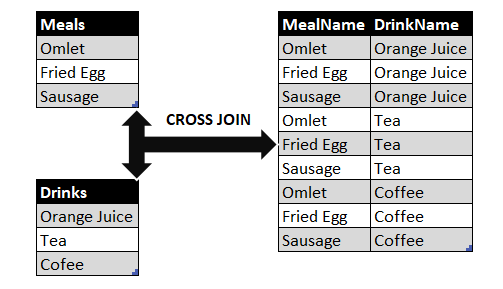

In [ ]:
query7 = """
            SELECT tb_customers.*,
                    tb_orders.*
            FROM
                customers as tb_customers
            CROSS JOIN
                orders as tb_orders

        """
pd.read_sql(query7, con)

,customerNumber,customerName,contactLastName,contactFirstName,phone,addressLine1,addressLine2,city,state,postalCode,country,salesRepEmployeeNumber,creditLimit,orderNumber,orderDate,requiredDate,shippedDate,status,comments,customerNumber
0,103,Atelier graphique,Schmitt,Carine,40.32.2555,"54, rue Royale",None,Nantes,None,44000,France,1370.0,21000,10100,2003-01-06,2003-01-13,2003-01-10,Shipped,None,363
1,103,Atelier graphique,Schmitt,Carine,40.32.2555,"54, rue Royale",None,Nantes,None,44000,France,1370.0,21000,10101,2003-01-09,2003-01-18,2003-01-11,Shipped,Check on availability.,128
2,103,Atelier graphique,Schmitt,Carine,40.32.2555,"54, rue Royale",None,Nantes,None,44000,France,1370.0,21000,10102,2003-01-10,2003-01-18,2003-01-14,Shipped,None,181
3,103,Atelier graphique,Schmitt,Carine,40.32.2555,"54, rue Royale",None,Nantes,None,44000,France,1370.0,21000,10103,2003-01-29,2003-02-07,2003-02-02,Shipped,None,121
4,103,Atelier graphique,Schmitt,Carine,40.32.2555,"54, rue Royale",None,Nantes,None,44000,France,1370.0,21000,10104,2003-01-31,2003-02-09,2003-02-01,Shipped,None,141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39767,496,Kelly’s Gift Shop,Snowden,Tony,+64 9 5555500,Arenales 1938 3’A,None,Auckland,None,None,New Zealand,1612.0,110000,10421,2005-05-29,2005-06-06,None,In Process,Custom shipping instructions were sent to ware...,124
39768,496,Kelly’s Gift Shop,Snowden,Tony,+64 9 5555500,Arenales 1938 3’A,None,Auckland,None,None,New Zealand,1612.0,110000,10422,2005-05-30,2005-06-11,None,In Process,None,157
39769,496,Kelly’s Gift Shop,Snowden,Tony,+64 9 5555500,Arenales 1938 3’A,None,Auckland,None,None,New Zealand,1612.0,110000,10423,2005-05-30,2005-06-05,None,In Process,None,314
39770,496,Kelly’s Gift Shop,Snowden,Tony,+64 9 5555500,Arenales 1938 3’A,None,Auckland,None,None,New Zealand,1612.0,110000,10424,2005-05-31,2005-06-08,None,In Process,None,141


Verifique que o número de linhas obtidos no ```CROSS JOIN``` é igual ao número de linhas da tabela customer x número de linhas da tabela orders.

# Subqueries

Uma Subquery, ou subconsulta, como também é chamada, é uma instrução SELECT dentro de uma outra consulta. Elas são necessárias quando temos que utilizar o resultado de uma query como entrada para uma outra query. Desta forma, se torna possível efetuar consultas que de outra forma seriam extremamente complicadas ou impossíveis de serem feitas de outra forma.



Podemos ter Subqueries basicamente em três cenários:
- ```SELECT```
- ```FROM``` 
- ```WHERE``` ou ```HAVING```

## SELECT

Quando usamos uma subquery dentro de um comando ```SELECT``` o resultado da subquery se torna uma coluna da tabela.

```sql
SELECT coluna1, coluna2, (SELECT FUNC1(coluna1) FROM table)

FROM table1

```


Vamos tentar extrair a variação percentual da coluna buyPrice em relação à média para cada item!

## FROM

A subquery utilizada no ```FROM```serve como fonte de dados. Às vezes precisamos utilizar o resultado de uma query como fonte de dados de outras consultas.

Vamos tentar extrair a média de preço dos produtos que estão pelo menos 15% acima da média de buyPrice.

## WHERE

Vamos tentar trazer os pedidos para os produtos que possuem buy price acima da média.

# Exercícios


* Faça uma query para trazer a cidade com mais pedidos. Dica: Use as tabelas orders e customers. 

In [ ]:
!pip install csv_to_sqlite 

In [ ]:
import csv_to_sqlite 

In [ ]:
options = csv_to_sqlite.CsvOptions(typing_style="full") 
input_files = ["train.csv"]
csv_to_sqlite.write_csv(input_files, "output.sqlite", options)

Written 891 rows into 1 tables in 0.042 seconds


891

In [ ]:
con2 = sqlite3.connect('database.db')